In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, log_loss
import vfi

In [3]:
#ihnoring warning that may show up in the course of the coding, setting the maximum columns to display to none so as to be 
#able to see the whole columns and lastly setting our plot style
warnings.filterwarnings('ignore')
pd.options.display.max_columns= None
sns.set(style="darkgrid")

In [4]:
#importing the two dataset >>train and test dataset
data_train = pd.read_csv("KDDTrain+.txt")
data_test = pd.read_csv('KDDTest+.txt')

In [5]:
#checking the data train head
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
#printing the shape of the train data
data_train.shape

(125972, 43)

In [7]:
#printing the shape of test data
data_test.shape

(22543, 43)

In [8]:
#naming the columns in the train and test dataset
#source: https://docs.google.com/spreadsheets/d/1oAx320Vo9Z6HrBrL6BcfLH6sh2zIk9EKCv2OlaMGmwY/edit?usp=sharing

data_labels_name = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
                   'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
                   'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
                   'su_attempted', 'num_root','num_file_creations', 'num_shells',
                   'num_access_files', 'num_outbound_cmds', 'is_host_login',
                   'is_guest_login', 'count', 'srv_count', 'serror_rate',
                   'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
                   'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
                   'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                   'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                   'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                   'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                   'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
                    ]
len(data_labels_name)

43

In [9]:
#representing the header in the dataset as the named columns and printing the first 5 cols in the train data
data_train.columns = data_labels_name
data_test.columns = data_labels_name
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
#printing the first 5 cols in the train data
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [11]:
#combining the train and test dataset since the test dataset already have attack type column
all_data = pd.concat([data_train, data_test], axis=0, ignore_index=True)
all_data.shape

(148515, 43)

In [12]:
all_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [13]:
all_data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
148510,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
148511,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.0,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
148512,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.0,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
148513,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.0,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
148514,0,tcp,sunrpc,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,10,0.0,0.0,1.0,1.0,0.25,1.0,1.00,255,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [14]:
#cheking the information of the dataset
#>>>there are 148515 instatnces in the whole dataset
#>>>there are 43 columns in the dataset
#>>>there are 15 cols with float64 data types, 24 columns with int64 cols, 4 cols with object cols
all_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
duration                       148515 non-null int64
protocol_type                  148515 non-null object
service                        148515 non-null object
flag                           148515 non-null object
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
wrong_fragment                 148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 

In [15]:
#no missing value in the dataset (both rows and columns)
all_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
all_data.shape

(148515, 43)

In [17]:
#checking for duplicate in dataset
all_data.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148485    False
148486    False
148487    False
148488    False
148489    False
148490    False
148491    False
148492    False
148493    False
148494    False
148495    False
148496    False
148497    False
148498    False
148499     True
148500    False
148501    False
148502    False
148503    False
148504    False
148505    False
148506    False
148507    False
148508    False
148509     True
148510    False
148511    False
148512    False
148513     True
148514    False
Length: 148515, dtype: b

In [18]:
#Due to the size of the dataset i couldnt get the number of duplicate i have in the dataset, but this actually helps to compute
#the no pf duplicate in the dataset.
#>>>There are 610 duplicated rows in the dataset
bool_dup_list = list(all_data.duplicated())
bool_T = []
bool_F = []
for bool_val in bool_dup_list:
    if bool_val == True:
        bool_T.append('True')
    else:
        bool_F.append('False')
        
print('The number of rows that is duplicated is: {}'.format(len(bool_T)))
print('The number of rows that is not duplicated is: {}'.format(len(bool_F)))

The number of rows that is duplicated is: 610
The number of rows that is not duplicated is: 147905


In [19]:
#value count of instances in each columns
for col in all_data.columns:
    print(col)
    print(all_data[col].value_counts())
    print('------------------------------')

duration
0        134971
1          2576
2           946
4           890
3           677
5           444
282         241
6           228
280         218
27          201
28          188
281         147
7           142
10          139
8           113
9           107
12           99
23           92
30           87
11           87
283          85
15           84
31           83
20           80
21           76
29           73
22           72
25           65
26           65
14           58
          ...  
7372          1
11466         1
21701         1
7244          1
11338         1
13014         1
4946          1
13015         1
30558         1
16985         1
593           1
41541         1
465           1
337           1
41285         1
12375         1
8277          1
26588         1
8019          1
17240         1
14038         1
9940          1
11861         1
7763          1
3409          1
1360          1
7379          1
5330          1
3025          1
8890          1
Name: duration,

Name: num_access_files, dtype: int64
------------------------------
num_outbound_cmds
0    148515
Name: num_outbound_cmds, dtype: int64
------------------------------
is_host_login
0    148503
1        12
Name: is_host_login, dtype: int64
------------------------------
is_guest_login
0    146687
1      1828
Name: is_guest_login, dtype: int64
------------------------------
count
1      33582
2      11250
3       5257
4       4481
5       3596
6       2794
7       2659
8       2237
9       2043
10      1947
11      1847
511     1774
12      1654
13      1483
14      1314
15      1239
16      1165
17      1046
18       943
19       862
20       787
21       735
22       637
23       605
24       558
25       507
26       453
27       443
510      421
28       384
       ...  
372        7
342        7
386        7
470        7
337        7
410        7
385        7
406        7
345        7
362        7
467        7
454        7
339        7
474        7
420        7
349        7
411     

In [20]:
#number of uniques instances in each column
print(all_data.nunique())

duration                        3424
protocol_type                      3
service                           70
flag                              11
src_bytes                       3601
dst_bytes                      10401
land                               2
wrong_fragment                     3
urgent                             4
hot                               29
num_failed_logins                  6
logged_in                          2
num_compromised                   96
root_shell                         2
su_attempted                       3
num_root                          91
num_file_creations                36
num_shells                         4
num_access_files                  10
num_outbound_cmds                  1
is_host_login                      2
is_guest_login                     2
count                            512
srv_count                        512
serror_rate                       99
srv_serror_rate                   94
rerror_rate                       98
s

In [21]:
#printing the instances present in the target column (attack_type)
all_data['attack_type'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [22]:
#statistical descriptive analysis of the dataset
all_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,148515.000000,1.485150e+05,1.485150e+05,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.0,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.00000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000
mean,276.783032,4.022849e+04,1.708908e+04,0.000215,0.020523,0.000202,0.189382,0.004323,0.402794,0.255065,0.001508,0.000976,0.273730,0.012073,0.000525,0.004013,0.0,0.000081,0.012309,83.336128,28.252237,0.256928,0.25534,0.137942,0.138482,0.672985,0.067762,0.097443,183.927792,119.464034,0.534526,0.084104,0.145933,0.030584,0.256125,0.251308,0.136215,0.136392,19.278463
std,2460.699490,5.409648e+06,3.703550e+06,0.014677,0.240071,0.019417,2.013173,0.072249,0.490462,22.231525,0.038807,0.042389,22.689176,0.517867,0.027701,0.095257,0.0,0.008989,0.110259,116.760724,75.370097,0.431920,0.43258,0.339382,0.341778,0.436543,0.194667,0.258887,98.528779,111.232434,0.448061,0.194103,0.308639,0.108976,0.428501,0.429721,0.322735,0.335277,2.739772
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,141.000000,17.000000,0.850000,0.91000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [23]:
#grouping the the datset by attack type and showing the mean value of other columns with the instances in the attack_type
#>>apache have a mean duration of 793.503392, mean src_bytes of 3.961348e+04 etc.
a = all_data.groupby(['attack_type']).mean()
a

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
attack_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
apache2,793.503392,3.961348e+04,1.115332,0.000000,0.000000,0.000000,0.000000,0.000000,0.666214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,42.845319,42.867028,0.303596,0.303596,0.687449,0.687449,1.000000,0.000000,0.000163,254.529172,250.402985,0.983731,0.005726,0.000000,0.000000,0.122090,0.122388,0.401710,0.407042,15.213026
back,0.260837,5.343643e+04,8097.003042,0.000000,0.000000,0.000000,1.901901,0.000000,1.000000,0.911027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.577186,5.073764,0.006251,0.006479,0.093399,0.129962,0.998319,0.003376,0.119521,175.590875,174.350570,0.995316,0.001688,0.017034,0.000000,0.001878,0.001878,0.058274,0.058183,12.424335
buffer_overflow,187.300000,1.627120e+03,12046.100000,0.000000,0.000000,0.000000,2.700000,0.040000,0.960000,3.920000,0.620000,0.000000,1.980000,0.960000,0.040000,0.080000,0.0,0.000000,0.000000,5.920000,1.260000,0.039600,0.000000,0.010200,0.020000,0.950400,0.022800,0.000000,77.360000,20.680000,0.700600,0.067400,0.451400,0.055600,0.031800,0.019200,0.084600,0.051800,4.060000
ftp_write,27.727273,1.754545e+02,4216.727273,0.000000,0.000000,0.363636,0.454545,0.000000,0.727273,0.090909,0.000000,0.000000,0.181818,0.272727,0.000000,0.363636,0.0,0.000000,0.272727,1.000000,1.090909,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.090909,56.545455,19.181818,0.649091,0.190909,0.640909,0.085455,0.094545,0.000000,0.003636,0.000000,8.000000
guess_passwd,2.859034,6.131776e+01,150.154984,0.000000,0.000000,0.000000,0.043614,0.407321,0.593458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.075545,1.121495,1.088006,0.004673,0.004673,0.062952,0.059836,0.983832,0.029984,0.007009,210.334112,157.679128,0.756659,0.022866,0.010576,0.008053,0.005008,0.005452,0.067601,0.055818,12.777259
httptunnel,22.263158,4.979023e+02,399.639098,0.000000,0.000000,0.000000,0.030075,0.000000,0.015038,0.067669,0.007519,0.007519,0.052632,0.000000,0.007519,0.000000,0.0,0.000000,0.000000,1.255639,1.090226,0.000000,0.000000,0.780677,0.842105,0.929774,0.121654,0.000000,212.804511,18.030075,0.088947,0.028722,0.007368,0.000150,0.000075,0.000000,0.069925,0.822556,13.563910
imap,13.583333,4.602500e+02,54972.916667,0.000000,0.000000,0.000000,0.333333,0.000000,0.083333,1.333333,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,95.333333,0.611667,0.529167,0.083333,0.106667,1.000000,0.000000,0.215000,47.500000,5.166667,0.833333,0.002500,0.610833,0.000000,0.530833,0.530833,0.002500,0.083333,15.083333
ipsweep,3.479679,9.798663e+00,14.575401,0.000000,0.000000,0.000000,0.000000,0.000000,0.006684,0.001070,0.000000,0.000000,0.001070,0.004813,0.000000,0.000000,0.0,0.000000,0.000000,1.031551,18.780749,0.000265,0.000000,0.114037,0.113682,0.998532,0.001893,0.688858,6.123529,80.879412,0.879936,0.126492,0.879930,0.547428,0.000005,0.000021,0.117695,0.109500,15.731016
land,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.160000,1.840000,0.973200,1.000000,0.026800,0.000000,0.933600,0.043200,0.800000,24.120000,4.080000,0.772400,0.029600,0.772000,0.533600,0.813600,0.674000,0.006000,0.000000,17.480000


In [24]:
#getting a frequency table of attack tyoe with respect to protocol)type
#with the beslow table it can be seen that
#>>> apache,back,ftp_write etc uses only tcp
#>>>ipsweep uses icmp and tcp alone and doesnt use udp
#>>>mscan uses the 3 protocol_type but uses tcp most type for intrusion
pd.crosstab(all_data['attack_type'], all_data['protocol_type'])

protocol_type,icmp,tcp,udp
attack_type,,,
apache2,0,737,0
back,0,1315,0
buffer_overflow,0,50,0
ftp_write,0,11,0
guess_passwd,0,1284,0
httptunnel,0,133,0
imap,0,12,0
ipsweep,3258,482,0
land,0,25,0


In [25]:
#frequency table for attack_type with respect to land
pd.crosstab(all_data['attack_type'], all_data['land'])

land,0,1
attack_type,,
apache2,737,0
back,1315,0
buffer_overflow,50,0
ftp_write,11,0
guess_passwd,1284,0
httptunnel,133,0
imap,12,0
ipsweep,3740,0
land,0,25


In [26]:
#frequebcy table of attack types with num_of_failed_logins
pd.crosstab(all_data['attack_type'], all_data['num_failed_logins'])

num_failed_logins,0,1,2,3,4,5
attack_type,,,,,,
apache2,737,0,0,0,0,0
back,1315,0,0,0,0,0
buffer_overflow,48,2,0,0,0,0
ftp_write,11,0,0,0,0,0
guess_passwd,765,518,0,0,0,1
httptunnel,133,0,0,0,0,0
imap,12,0,0,0,0,0
ipsweep,3740,0,0,0,0,0
land,25,0,0,0,0,0


In [27]:
#cheking the correlation of numeriic cols in the dataset
all_data.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
duration,1.000000,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,0.000525,-0.064476,0.043998,0.046792,0.087257,0.046908,0.083243,-0.000996,0.067388,NaN,-0.000825,-0.000260,-0.078091,-0.039095,-0.064629,-0.064627,0.164667,0.165063,0.074720,-0.017784,-0.039486,0.050312,-0.098015,-0.104633,0.223635,0.201275,-0.025950,-0.053811,-0.052307,0.143902,0.163311,-0.126979
src_bytes,0.068959,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,-0.000443,-0.003286,-0.000079,-0.000274,-0.000166,-0.000087,-0.000151,-0.000130,-0.000302,NaN,-0.000067,-0.000817,-0.004796,-0.002609,-0.002785,-0.002990,0.011592,0.011812,0.003634,-0.000637,-0.002500,-0.005586,-0.006663,-0.006312,0.000730,0.000559,-0.001424,-0.004003,-0.002959,-0.001745,0.010495,-0.017770
dst_bytes,0.034056,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,0.000096,-0.002635,0.001253,0.000971,0.001155,0.001250,0.000086,-0.000061,0.000353,NaN,-0.000038,-0.000461,-0.003226,-0.001611,-0.002665,-0.002649,0.009447,0.009377,0.003450,-0.001588,-0.001553,0.002225,-0.003977,-0.004168,0.009834,0.010847,-0.001143,-0.002639,-0.002567,0.009986,0.009600,-0.013567
land,-0.001651,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,-0.000878,-0.012056,-0.000168,-0.000571,-0.000338,-0.000177,-0.000342,-0.000278,-0.000618,NaN,-0.000132,-0.001639,-0.010042,-0.005144,0.024544,0.025271,-0.005061,-0.005948,0.009253,-0.002565,0.040548,-0.024564,-0.015214,0.009425,-0.004612,0.032151,0.072119,0.020496,0.015019,-0.005983,-0.005972,-0.026944
wrong_fragment,-0.009616,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,-0.005115,-0.070208,-0.000981,-0.003323,-0.001969,-0.001031,-0.001993,-0.001621,-0.003602,NaN,-0.000768,-0.009543,-0.019921,0.021143,-0.038163,-0.050462,-0.034368,-0.034638,0.051176,-0.025897,-0.022830,0.032552,-0.046660,-0.046592,0.051988,0.040057,-0.009778,-0.045496,-0.049995,0.019285,-0.034777,-0.130583
urgent,0.002426,-0.000074,0.000179,-0.000153,-0.000889,1.000000,0.008151,0.037775,0.011253,0.029034,0.178312,0.065206,0.031588,0.023194,0.037359,0.028685,NaN,-0.000094,-0.001161,-0.007336,-0.003762,-0.006188,-0.006141,-0.004228,-0.004215,0.007793,-0.003621,-0.003916,-0.011494,-0.009655,-0.003882,0.007248,0.002249,0.005386,-0.005676,-0.006068,-0.003789,-0.001098,-0.044597
hot,0.000664,0.000347,-0.000297,-0.001381,-0.008042,0.008151,1.000000,0.000297,0.113229,0.002582,0.025475,0.000437,0.002082,0.090855,0.009083,0.000777,NaN,0.006596,0.720317,-0.066004,-0.033403,-0.054441,-0.054145,-0.034768,-0.033946,0.066636,-0.017705,-0.026141,-0.012182,-0.051127,-0.036212,-0.009751,-0.033312,-0.022945,-0.053127,-0.053735,-0.031548,-0.034212,-0.130702
num_failed_logins,0.000525,-0.000443,0.000096,-0.000878,-0.005115,0.037775,0.000297,1.000000,-0.039067,0.010565,0.016887,0.040395,0.009945,0.012282,-0.001134,0.003350,NaN,0.009831,0.078691,-0.042096,-0.021507,-0.033650,-0.033809,-0.001024,-0.001111,0.043984,-0.017883,-0.022160,0.005604,-0.006239,0.003339,-0.013585,-0.023664,-0.009839,-0.032305,-0.031961,-0.007964,-0.004593,-0.152250
logged_in,-0.064476,-0.003286,-0.002635,-0.012056,-0.070208,0.011253,0.113229,-0.039067,1.000000,0.013970,0.047325,0.028045,0.014690,0.028334,0.023086,0.051298,NaN,0.010946,0.123229,-0.530782,-0.199022,-0.466502,-0.464962,-0.294625,-0.291345,0.590631,-0.221176,0.122000,-0.385985,0.618146,0.598825,-0.256915,-0.177225,-0.054810,-0.465815,-0.468539,-0.290700,-0.294686,0

In [28]:
#spliting numeric and string cols
all_data_string = all_data.select_dtypes(include='object')
all_data_num = all_data.select_dtypes(include=np.number)
print('There are {} string column'.format(len(all_data_string.columns)))
print('There are {} numeric (float and integer) column'.format(len(all_data_num.columns)))

There are 4 string column
There are 39 numeric (float and integer) column


Text(0.5,1,'Attacks Type Frequency')

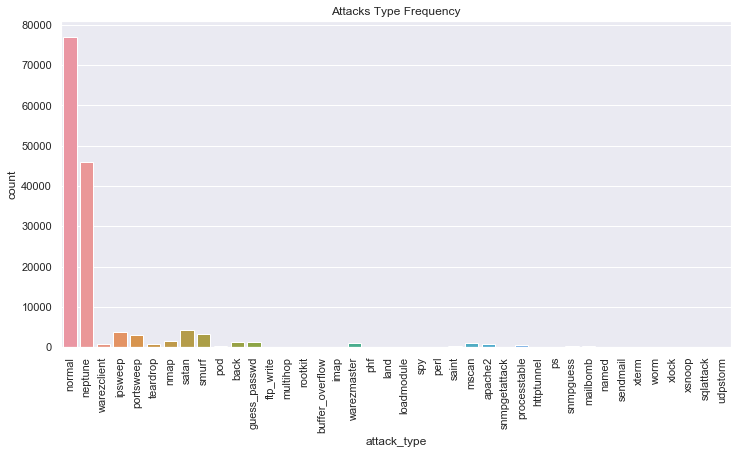

In [29]:
#Visualizing the attack type frequency
#>>>normal is the highest
fig = plt.figure(figsize=(12,6))
plt.xticks( rotation=90)
sns.countplot(all_data['attack_type'])
plt.title('Attacks Type Frequency')

Text(0.5,1,'Protocol Type Frequency')

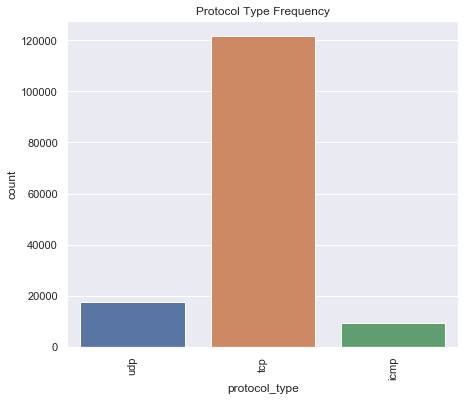

In [30]:
#Visualiszing the Proto  type Fequency
#>>>tcp is the most used
fig = plt.figure(figsize=(7,6))
plt.xticks( rotation=90)
sns.countplot(all_data['protocol_type'])
plt.title('Protocol Type Frequency')

Text(0.5,1,'Service Frequency')

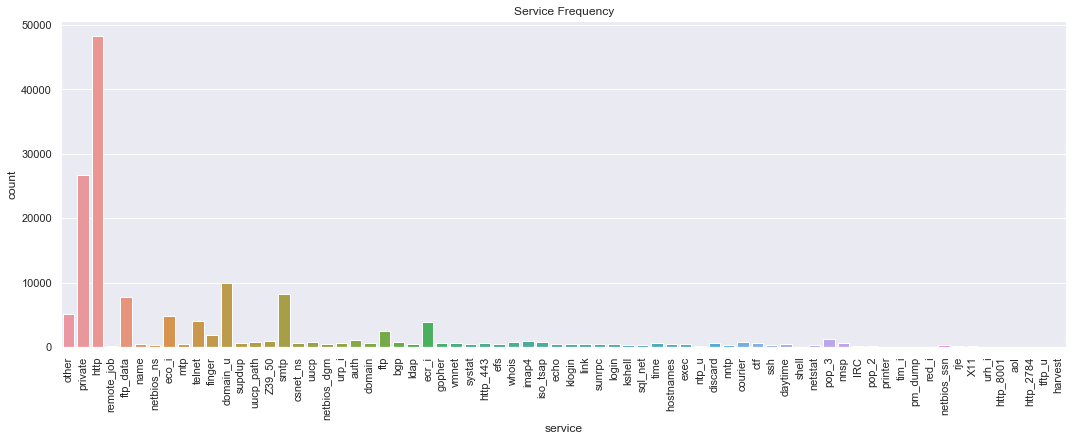

In [31]:
#service frequency
fig = plt.figure(figsize=(18,6))
plt.xticks( rotation=90)
sns.countplot(all_data['service'])
plt.title('Service Frequency')

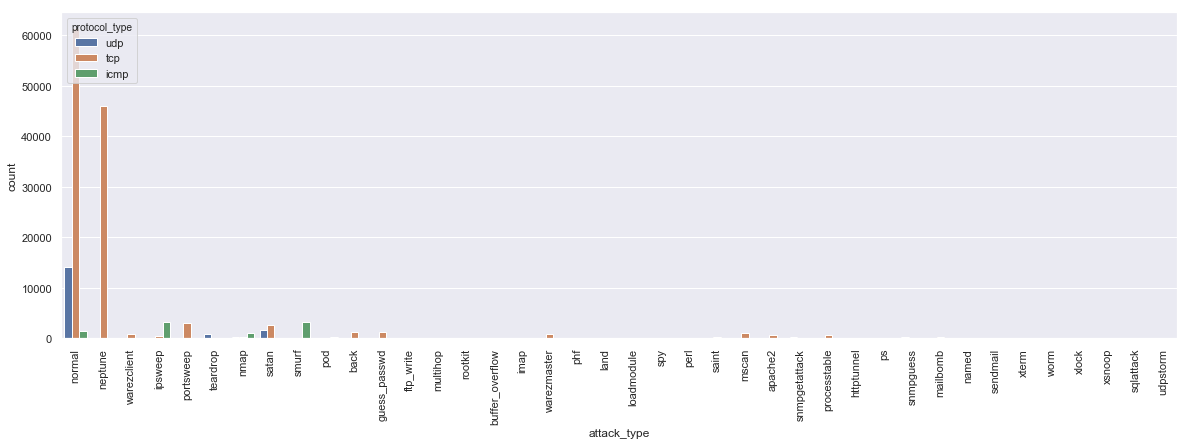

In [32]:
#Visualizing frequency of attack ype with respect to protocol type
fig = plt.figure(figsize=(20,6))
plt.xticks( rotation=90)
sns.countplot(all_data['attack_type'], hue=all_data['protocol_type'])

Text(0.5,1,'Land Frequency')

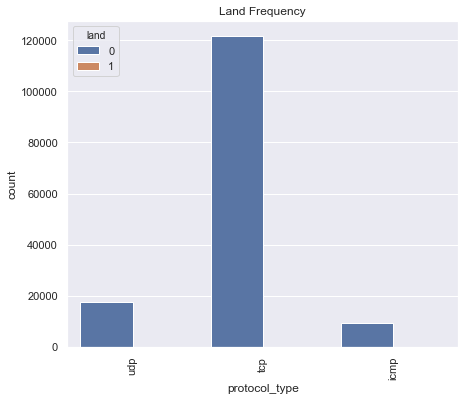

In [33]:
#Land frequency
fig = plt.figure(figsize=(7,6))
plt.xticks( rotation=90)
sns.countplot(all_data['protocol_type'], hue=all_data['land'])
plt.title('Land Frequency')

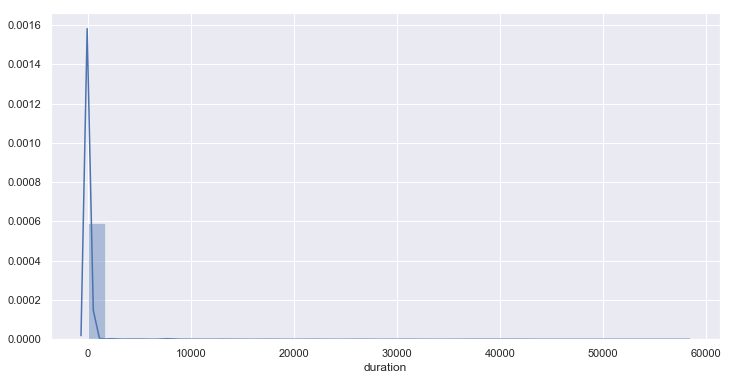

In [34]:
#dustribution plot for duration
#>>>the duration used by most of the attack is 0
fig = plt.figure(figsize=(12,6))
sns.distplot(all_data['duration'], bins=35)

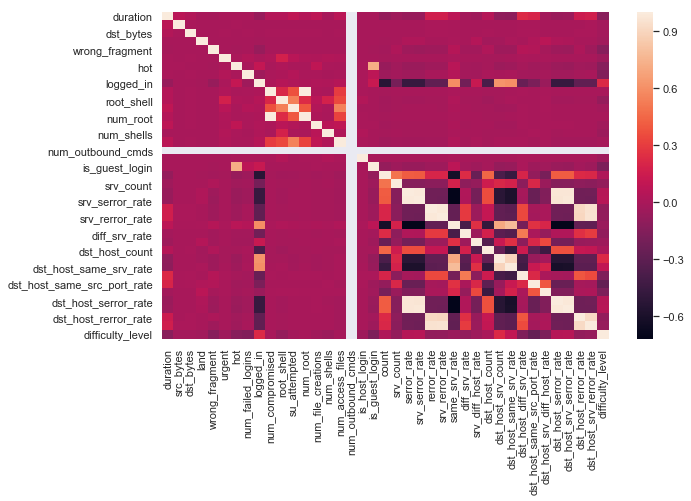

In [35]:
#visualising the numerial cols correlation
fig = plt.figure(figsize=(10,6))
sns.heatmap(all_data.corr())

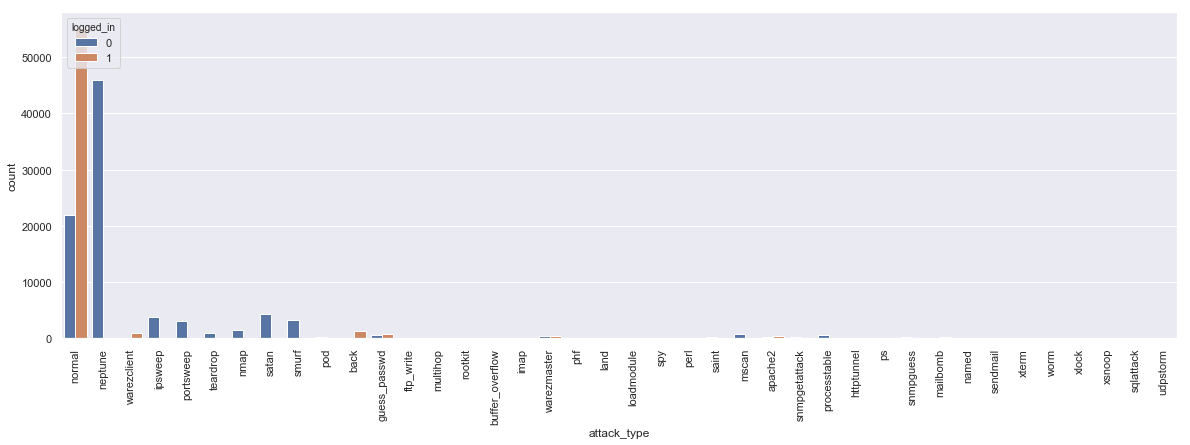

In [36]:
fig = plt.figure(figsize=(20,6))
plt.xticks( rotation=90)
sns.countplot(all_data['attack_type'], hue=all_data['logged_in'])


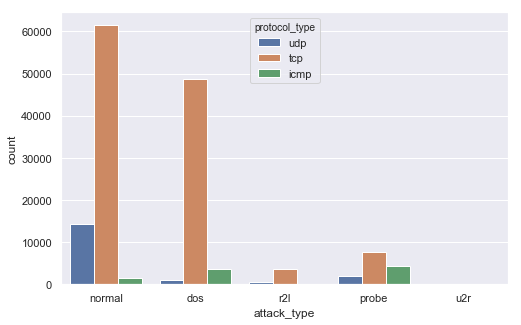

In [37]:
#mapping attacks in the attack type to the class of intrusion they belong and visuliasing it
attack_dict = {'apache2':'dos', 'back':'dos','buffer_overflow':'u2r', 'ftp_write':'r2l', 'guess_passwd':'r2l', 
                    'httptunnel':"r2l", 'imap':'r2l', 'ipsweep':'probe', 'land':'dos','loadmodule':'u2r', 'mailbomb':'r2l',
               'mscan':'probe','multihop':'r2l', 'named':'r2l', 'neptune':'dos', 'nmap':'probe', 'normal':'normal', 
               'perl':'u2r', 'phf':'r2l', 'pod':'dos','portsweep':'probe','processtable':'dos','ps':'u2r','rootkit':'u2r', 
               'saint':'probe','satan':'probe','sendmail':'r2l','smurf':'dos','snmpgetattack':'r2l','snmpguess':'r2l',
               'spy':'r2l','sqlattack':'u2r','teardrop':'dos','udpstorm':'dos', 'warezclient':'r2l','warezmaster':'r2l',
               'worm':'dos','xlock':'r2l','xsnoop':'r2l','xterm':'u2r'}
data_attack_type_group = all_data['attack_type'].map(attack_dict)
fig = plt.figure(figsize=(8,5))
sns.countplot(data_attack_type_group, hue=all_data['protocol_type'])

In [38]:
# attack_dict = {'apache2':'dos', 'back':'dos','buffer_overflow':'u2r', 'ftp_write':'r2l', 'guess_passwd':'r2l', 
#                     'httptunnel':"r2l", 'imap':'r2l', 'ipsweep':'probe', 'land':'dos','loadmodule':'u2r', 'mailbomb':'r2l',
#                'mscan':'probe','multihop':'r2l', 'named':'r2l', 'neptune':'dos', 'nmap':'probe', 'normal':'normal', 
#                'perl':'u2r', 'phf':'r2l', 'pod':'dos','portsweep':'probe','processtable':'dos','ps':'u2r','rootkit':'u2r', 
#                'saint':'probe','satan':'probe','sendmail':'r2l','smurf':'dos','snmpgetattack':'r2l','snmpguess':'r2l',
#                'spy':'r2l','sqlattack':'u2r','teardrop':'dos','udpstorm':'dos', 'warezclient':'r2l','warezmaster':'r2l',
#                'worm':'dos','xlock':'r2l','xsnoop':'r2l','xterm':'u2r'}
# data_attack_type_group = all_data['attack_type'].map(attack_dict)
# fig = plt.figure(figsize=(8,5))
# sns.countplot(data_attack_type_group, hue=all_data['protocol_type'])

# ENCODING

In [39]:
all_data_string.columns

Index(['protocol_type', 'service', 'flag', 'attack_type'], dtype='object')

In [40]:
#using frequencing encoding too encode the categorical cols
protocol_type_dict = dict(all_data.groupby(['protocol_type']).size()/len(all_data))
service_dict = dict(all_data.groupby(['service']).size()/len(all_data))
flag_dict = dict(all_data.groupby(['flag']).size()/len(all_data))
print(service_dict)

{'IRC': 0.0013466653200013467, 'X11': 0.0005925327408005925, 'Z39_50': 0.006107127226206107, 'aol': 1.3466653200013467e-05, 'auth': 0.006881459785206882, 'bgp': 0.005090394909605091, 'courier': 0.005211594788405212, 'csnet_ns': 0.0038985961014038986, 'ctf': 0.004066929266404067, 'daytime': 0.0036965963034036966, 'discard': 0.0037975962024037976, 'domain': 0.004174662492004174, 'domain_u': 0.0669090664242669, 'echo': 0.0031713968286031713, 'eco_i': 0.03264316735683264, 'ecr_i': 0.025781907551425783, 'efs': 0.003487863178803488, 'exec': 0.003373396626603373, 'finger': 0.012813520519812813, 'ftp': 0.01646971686361647, 'ftp_data': 0.05191394808605192, 'gopher': 0.0037167962832037166, 'harvest': 1.3466653200013467e-05, 'hostnames': 0.003252196747803252, 'http': 0.32448574218092446, 'http_2784': 6.733326600006733e-06, 'http_443': 0.003811062855603811, 'http_8001': 1.3466653200013467e-05, 'imap4': 0.006416860249806417, 'iso_tsap': 0.004948995051004949, 'klogin': 0.003056930276403057, 'kshell'

In [41]:
#from cell 44 to 52 rounding up the frequency encoding values in the categorial columns to a minimal value

In [42]:
new_key = []
for value in service_dict.values():
    new_key.append(round(value,6))

In [43]:
for key, value in zip(service_dict.keys(), new_key):
    service_dict[key] = value
    
#print(service_dict)

In [44]:
protocol_type_dict.values()

dict_values([0.06284887048446285, 0.8185503147830185, 0.1186008147325186])

In [45]:
prot_new_key = []
for value in protocol_type_dict.values():
    prot_new_key.append(round(value,2))

In [46]:
for key, value in zip(protocol_type_dict.keys(), prot_new_key):
    protocol_type_dict[key] = value

In [47]:
print(protocol_type_dict)


{'icmp': 0.06, 'tcp': 0.82, 'udp': 0.12}


In [48]:
flag_new_key = []
for value in flag_dict.values():
    flag_new_key.append(round(value,4))

In [49]:
for key, value in zip(flag_dict.keys(), flag_new_key):
    flag_dict[key] = value

In [50]:
print(flag_dict)

{'OTH': 0.0003, 'REJ': 0.1016, 'RSTO': 0.0157, 'RSTOS0': 0.0007, 'RSTR': 0.0208, 'S0': 0.2482, 'S1': 0.0026, 'S2': 0.001, 'S3': 0.002, 'SF': 0.6048, 'SH': 0.0023}


In [51]:
all_data['protocol_type'].value_counts()

tcp     121567
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

In [52]:
#mapping the rounded up frequency encoding value to the values in the corresponding categorical columns
all_data['protocol_type'] = all_data['protocol_type'].map(protocol_type_dict)
all_data['service'] = all_data['service'].map(service_dict)
all_data['flag'] = all_data['flag'].map(flag_dict)

In [53]:
all_data[['protocol_type', 'service', 'flag']].head()

,protocol_type,service,flag
0,0.12,0.034993,0.6048
1,0.82,0.179282,0.2482
2,0.82,0.324486,0.6048
3,0.82,0.324486,0.6048
4,0.82,0.179282,0.1016


# SPLITTING DATA

In [54]:
#drpoing the duplicatte data in the dataset
all_data.drop_duplicates(inplace=True)

In [55]:
#droping some irrelevant cols and also the target cols
X = all_data.drop(['num_outbound_cmds','attack_type', 'difficulty_level'], axis=1)
y = all_data['attack_type']

In [56]:
#splitting dataset into train and test with train_size = 0.7 and test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [57]:
X_train.drop(['protocol_type','service','flag'], axis=1).columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [58]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
77286,0,0.82,0.324486,0.6048,335,3608,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.00,150,255,1.00,0.00,0.01,0.04,0.0,0.00,0.00,0.00
119352,0,0.82,0.324486,0.6048,336,1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,9,0.0,0.0,0.0,0.0,1.0,0.0,0.22,218,254,1.00,0.00,0.00,0.04,0.0,0.00,0.00,0.00
65301,0,0.82,0.324486,0.6048,262,872,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,9,0.0,0.0,0.0,0.0,1.0,0.0,0.00,139,255,1.00,0.00,0.01,0.04,0.0,0.00,0.01,0.01
16156,0,0.82,0.051914,0.6048,567,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,150,42,0.12,0.05,0.12,0.05,0.0,0.02,0.00,0.00
142901,7410,0.82,0.026792,0.6048,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,204,0.80,0.20,0.00,0.00,0.5,0.62,0.19,0.01


In [59]:
#droping the frequency encoded cols amd coverted the dataframe to np array so as to scale the dataset
new_X_train = X_train.drop(['protocol_type','service','flag'], axis=1)
train_enc_col_arr = X_train[['protocol_type','service','flag']].as_matrix()
new_X_test = X_test.drop(['protocol_type','service','flag'], axis=1)
test_enc_col_arr = X_test[['protocol_type','service','flag']].as_matrix()
new_X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
77286,0,335,3608,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.00,150,255,1.00,0.00,0.01,0.04,0.0,0.00,0.00,0.00
119352,0,336,1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,9,0.0,0.0,0.0,0.0,1.0,0.0,0.22,218,254,1.00,0.00,0.00,0.04,0.0,0.00,0.00,0.00
65301,0,262,872,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,9,0.0,0.0,0.0,0.0,1.0,0.0,0.00,139,255,1.00,0.00,0.01,0.04,0.0,0.00,0.01,0.01
16156,0,567,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,150,42,0.12,0.05,0.12,0.05,0.0,0.02,0.00,0.00
142901,7410,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,204,0.80,0.20,0.00,0.00,0.5,0.62,0.19,0.01


In [60]:
#scaling the dataset 
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(new_X_train)
X_test_scaled = scaler.transform(new_X_test)

In [61]:
X_train_scaled

array([[-0.12797615, -0.00766986, -0.00416691, ..., -0.21128264,
        -0.35391553, -0.33140902],
       [-0.12797615, -0.0076697 , -0.0047353 , ..., -0.21128264,
        -0.35391553, -0.33140902],
       [-0.12797615, -0.00768183, -0.00477724, ..., -0.21128264,
        -0.31543395, -0.29518336],
       ...,
       [-0.12797615, -0.00767577, -0.00480535, ..., -0.21128264,
        -0.35391553, -0.33140902],
       [-0.12797615, -0.00771774, -0.00494254, ..., -0.21128264,
        -0.35391553, -0.33140902],
       [-0.12797615, -0.0076838 , -0.00422045, ..., -0.21128264,
        -0.35391553, -0.33140902]])

In [62]:
#adding the frequency encoded categorical cols to the scale cols
new_train_scale = np.hstack((X_train_scaled, train_enc_col_arr))
new_test_scale = np.hstack((X_test_scaled, test_enc_col_arr))

In [63]:
#printing the shape of train and test data
print(new_train_scale.shape, new_test_scale.shape)

(93385, 40) (16998, 40)


In [64]:
#coverting the numpy array data to dataframe to have a feel of what we want to use to train our machine learning model
columns = list(new_X_train.columns)
columns.extend(['protocol_type','service','flag'])
#print(columns)
scale_train_df = pd.DataFrame(new_train_scale,  columns=columns)
scale_test_df = pd.DataFrame(new_test_scale,  columns=columns)
scale_train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.127976,-0.007670,-0.004167,-0.015351,-0.090334,-0.012797,-0.10838,-0.064832,0.828168,-0.01379,-0.04679,-0.028196,-0.014637,-0.027841,-0.02372,-0.051554,-0.010349,-0.128114,-0.264052,-0.209381,-0.232117,-0.22324,-0.328344,-0.327153,0.338569,-0.273631,-0.457146,-0.062954,0.849418,0.682744,-0.378548,-0.525183,0.017874,-0.240190,-0.211283,-0.353916,-0.331409,0.82,0.324486,0.6048
1,-0.127976,-0.007670,-0.004735,-0.015351,-0.090334,-0.012797,-0.10838,-0.064832,0.828168,-0.01379,-0.04679,-0.028196,-0.014637,-0.027841,-0.02372,-0.051554,-0.010349,-0.128114,-0.342435,-0.292804,-0.232117,-0.22324,-0.328344,-0.327153,0.338569,-0.273631,0.298754,0.593528,0.839761,0.682744,-0.378548,-0.555444,0.017874,-0.240190,-0.211283,-0.353916,-0.331409,0.82,0.324486,0.6048
2,-0.127976,-0.007682,-0.004777,-0.015351,-0.090334,-0.012797,-0.10838,-0.064832,0.828168,-0.01379,-0.04679,-0.028196,-0.014637,-0.027841,-0.02372,-0.051554,-0.010349,-0.128114,-0.332637,-0.292804,-0.232117,-0.22324,-0.328344,-0.327153,0.338569,-0.273631,-0.457146,-0.169150,0.849418,0.682744,-0.378548,-0.525183,0.017874,-0.240190,-0.211283,-0.315434,-0.295183,0.82,0.324486,0.6048
3,-0.127976,-0.007632,-0.004972,-0.015351,-0.090334,-0.012797,-0.10838,-0.064832,0.828168,-0.01379,-0.04679,-0.028196,0.196379,-0.027841,-0.02372,-0.051554,-0.010349,-0.128114,-0.411020,-0.388144,-0.232117,-0.22324,-0.328344,-0.327153,0.338569,-0.273631,-0.457146,-0.062954,-1.207625,-1.619483,-0.144060,-0.192318,0.105522,-0.240190,-0.101300,-0.353916,-0.331409,0.82,0.051914,0.6048
4,2.663263,-0.007725,-0.004962,-0.015351,-0.090334,-0.012797,-0.10838,-0.064832,-1.207484,-0.01379,-0.04679,-0.028196,-0.014637,-0.027841,-0.02372,-0.051554,-0.010349,-0.128114,-0.411020,-0.388144,-0.232117,-0.22324,-0.328344,-0.327153,0.338569,-0.273631,-0.457146,0.950732,0.356887,0.159510,0.559401,-0.555444,-0.332719,2.447476,3.198173,0.377234,-0.295183,0.82,0.026792,0.6048


In [65]:
#Label encoding the target col
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train

array([16, 16, 16, ..., 16, 16, 16])

# MODELLING

In [66]:
#creating and training a naive bayes model with the training dataset
nb = GaussianNB() 
nb.fit(new_train_scale,y_train) #training naive bayes model
nb_pred = nb.predict(new_test_scale)#testing naive bayes model with testing dataset

GaussianNB()

In [68]:
#training VFI model
vfi = vfi.VFI(n_bins='auto', strategy='kmeans')
vfi.fit(new_train_scale, y_train) #training vfi model
vfi_pred = vfi.predict(new_test_scale) #testing vfi model with testing dataset

VFI(strategy='kmeans')

# EVALUATION METRICS

In [70]:
#checking the models acccuracy
nb_acc = accuracy_score(y_test, nb_pred) *100
print("The accuracy of Naive Bayes model is: ", nb_acc)
vfi_acc = accuracy_score(y_test, vfi_pred)*100
print("The accuracy of Voting feature interval model is: ",vfi_acc)

The accuracy of Naive Bayes model is:  90.08706906694906
The accuracy of Voting feature interval model is:  96.62313213319213


In [77]:
#checking the models claasification report
print("Naive Bayes model classification report")
print(classification_report(y_test, nb_pred))

Naive Bayes model classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       132
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           4       1.00      0.19      0.32       130
           5       1.00      0.21      0.35        14
           6       0.00      0.00      0.00         2
           7       1.00      0.01      0.02       369
           8       1.00      1.00      1.00         3
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00        30
          11       0.73      0.94      0.82       101
          12       0.00      0.00      0.00         3
          13       0.00      0.50      0.01         2
          14       1.00      0.98      0.99     14428
          15       0.19      0.82      0.31       159
          16       0.00      0.00      0.

In [79]:
#checking the models classification report
print("Voting Feature iInterval model classification report")
print(classification_report(y_test, vfi_pred))

Voting Feature iInterval model classification report
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        75
           1       0.96      0.98      0.97       132
           2       0.50      0.33      0.40         6
           3       0.00      0.00      0.00         2
           4       0.99      0.88      0.93       130
           5       0.59      0.93      0.72        14
           6       0.33      1.00      0.50         2
           7       0.97      0.82      0.89       369
           8       0.02      1.00      0.05         3
           9       0.33      0.50      0.40         2
          10       0.91      1.00      0.95        30
          11       0.74      0.97      0.84       101
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       1.00      0.99      0.99     14428
          15       0.76      0.84      0.80       159
          16       0.00     